<font face="Arial" size="8"> Machine Learning para Predições de Saúde</font><br><br>
<font face="Arial" size="5"> Baseado no Colab de prof. Alexandre Chiavegatto Filho - Faculdade de Saúde Pública da USP e profa. Carine Savalli Redigolo - UNIFESP disponibilizado no 12º Congresso Brasileiro de Epidemiologia </font> <br>
<font face="Arial" size="5">  </font>

<font face="Arial" size="4"> <br>
<b>Objetivo</b>: Predizer a reinternação de um indivíduo por causa de asma <br>
<b>População alvo</b>: Pacientes com asma avaliados no baseline quanto a dados demográficos, clínicos, sintomas e capacidade pulmonar <br><br>
<b>Desfecho</b>: Reinternação do paciente por asma (Sim/Não) <br>
<b>Possíveis Preditores</b>: </font><br><br>

<font face="Arial" size="4"><b>Etapas de Análise</b>:</font>
<font face="Arial" size="4"> <br> - Instalação de pacotes adicionais <br> - Importação de bibliotecas e pacotes
<br> - Leitura do conjunto de dados
<br> - Preparação do conjunto de dados (pré-processamento)
<br> - Execução dos algoritmos de machine learning

### Instalação de pacotes e importação de bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Leitura do banco de dados - df

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/carinesavalli/cong_epidemio24/main/ASMA2.csv', delimiter=";", encoding='latin1')
#df = pd.read_csv('int_pred.csv', delimiter=",", encoding='latin1')
df = pd.read_csv('banco_pct_pronto.csv', delimiter=",", encoding='latin1')


#### Verificar número de pacientes (linhas) e número de variáveis (colunas)

#### Verificar quais as colunas, número de observações não-nulas e tipo das variáveis

In [3]:
df.drop(columns=["ap_munpcn"], inplace=True)
df.drop(columns=["pa_dtnasc_recode"], inplace=True)
df.drop(columns=["ap_racacor"], inplace=True)
df.drop(columns=["dt_obito"], inplace=True)
df.drop(columns=["causabas"], inplace=True)
df.drop(columns=["obito"], inplace=True)
df.drop(columns=["qt_obito"], inplace=True)
df.drop(columns=["obito_internacao"], inplace=True)
df.drop(columns=["dt_proc_min"], inplace=True) #colocar depois
df.drop(columns=["proc_min"], inplace=True)
df.drop(columns=["f_organiz_min"], inplace=True)
df.drop(columns=["dt_proc_max"], inplace=True)
df.drop(columns=["saida_max"], inplace=True)
df.drop(columns=["proc_max"], inplace=True)
df.drop(columns=["f_organiz_max"], inplace=True)
df.drop(columns=["cidpri_max"], inplace=True)
df.drop(columns=["tempo_coorte"], inplace=True)
df.drop(columns=["uf"], inplace=True)
df.drop(columns=["uf_rec"], inplace=True)
df.drop(columns=["prin_csap_reint"], inplace=True)
df.drop(columns=["n_int"], inplace=True) #colocar depois
df.drop(columns=["ano"], inplace=True)
df.drop(columns=["qt_aih"], inplace=True)
df.drop(columns=["num_idade"], inplace=True)
df.drop(columns=["cidpri_min"], inplace=True)
df.drop(columns=["n_reint"], inplace=True)
df.drop(columns=["div_idade"], inplace=True)
#df.drop(columns=["num_idade_dias"], inplace=True)
#df.drop(columns=["dias_int1"], inplace=True)
df.drop(columns=["div_idade2_recode"], inplace=True)
df.drop(columns=["car_int"], inplace=True)
df.drop(columns=["Tipologia"], inplace=True)
df.drop(columns=["Tipologia_rec"], inplace=True)
df.drop(columns=["reintgrupo"], inplace=True)
df.drop(columns=["n_reintgrupo"], inplace=True)
df.drop(columns=["aux_grupos"], inplace=True)
df.drop(columns=["n_reint_recode"], inplace=True)
# df.drop(columns=["natureza"], inplace=True)
# df.drop(columns=["ap_sexo"], inplace=True)
# df.drop(columns=["regiao"], inplace=True)
# df.drop(columns=["diag_cat"], inplace=True)
df.drop(columns=["div_idade2"], inplace=True)
# df.drop(columns=["status_resi"], inplace=True)



#### Imprimir as 10 primeiras linhas

In [4]:
df.head(10)

,id_cluster,X,ap_sexo,reint,regiao,diag_cat,num_idade_dias,dias_int1,natureza,status_resi
0,413848170.0,646237,F,0,Norte,5,316,2.0,P?blico,nao-resi
1,831195110.0,1296493,M,0,Norte,8,529,2.0,P?blico,resi
2,760991290.0,1187144,F,0,Norte,2,241,2.0,P?blico,resi
3,746368730.0,1164545,F,0,Norte,2,432,2.0,P?blico,resi
4,388064100.0,606119,M,0,Norte,5,743,2.0,P?blico,resi
5,926771150.0,1445207,F,0,Norte,2,753,2.0,P?blico,resi
6,20277900.0,31426,F,0,Norte,2,672,2.0,P?blico,resi
7,600893411.0,937801,M,0,Norte,2,122,2.0,P?blico,resi
8,727728731.0,1135767,M,0,Norte,2,515,2.0,P?blico,resi
9,967394710.0,1508988,F,0,Norte,2,1770,2.0,P?blico,resi


In [5]:
df = df.loc[(df['diag_cat'] == 7)]
df.drop(columns=["diag_cat"], inplace=True)

#### Reinternação - DESFECHO

In [6]:
df['reint'].value_counts()

,count
reint,
0,129242
1,23234


#### Analisar se tem missings no banco de dados

In [7]:
df.isnull().sum()

,0
id_cluster,0
X,0
ap_sexo,0
reint,0
regiao,0
num_idade_dias,0
dias_int1,0
natureza,96
status_resi,1


#### Criar variáveis indicadores de missing para VEF1 e Teste_6min - será que pode ser informativo?

In [8]:
df['missing_natureza'] = 0
df.loc[(df['natureza'] == '') | (df['natureza'].isna()), 'missing_natureza'] = 1

In [9]:
df['missing_natureza'].value_counts()

,count
missing_natureza,
0,152380
1,96


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206947 entries, 16 to 1559878
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id_cluster        206947 non-null  float64
 1   X                 206947 non-null  int64  
 2   ap_sexo           206947 non-null  object 
 3   reint             206947 non-null  int64  
 4   regiao            206947 non-null  object 
 5   num_idade_dias    206947 non-null  int64  
 6   dias_int1         206947 non-null  float64
 7   natureza          206834 non-null  object 
 8   status_resi       206947 non-null  object 
 9   missing_natureza  206947 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 17.4+ MB


#### Exluir a coluna Indivíduo

In [10]:
df.drop(columns=["id_cluster"], inplace=True)
df.drop(columns=["X"], inplace=True)


# Pré-processamento
### Codificação, outliers, imputação, padronização
#### Obs.: A codificação (transformar em 0/1) pode ser feita *antes* da divisão treino/teste por ser somente atribuição um-a-um. Todo o resto do pré-processamento deve ser feito nos *dados de treino* (adaptar os dados de teste posteriormente)

#### Para variáveis qualitativas binárias (Sexo) transformar em dummies

In [11]:
df = pd.get_dummies(df, columns=["ap_sexo"], drop_first=True)
df = pd.get_dummies(df, columns=["status_resi"], drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152476 entries, 16 to 1103737
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   reint             152476 non-null  int64  
 1   regiao            152476 non-null  object 
 2   num_idade_dias    152476 non-null  int64  
 3   dias_int1         152476 non-null  float64
 4   natureza          152380 non-null  object 
 5   missing_natureza  152476 non-null  int64  
 6   ap_sexo_M         152476 non-null  bool   
 7   status_resi_resi  152476 non-null  bool   
dtypes: bool(2), float64(1), int64(3), object(2)
memory usage: 8.4+ MB


In [13]:
df['ap_sexo_M'] = df['ap_sexo_M'].astype('int64')
df['status_resi_resi'] = df['status_resi_resi'].astype('int64')

#### Para variáveis qualitativas com mais de duas categorias - OneHotEncoder

In [14]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.1 MB/s eta 0:00:00


In [15]:
ordinal_features = ["regiao", "natureza"]

In [16]:
import category_encoders as ce
from category_encoders.one_hot import OneHotEncoder

for feature in ordinal_features:
  onehotenc = OneHotEncoder(cols=[feature], use_cat_names=True)
  df = onehotenc.fit_transform(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206947 entries, 16 to 1559878
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   reint                 206947 non-null  int64  
 1   regiao_Norte          206947 non-null  int64  
 2   regiao_Nordeste       206947 non-null  int64  
 3   regiao_Sudeste        206947 non-null  int64  
 4   regiao_Sul            206947 non-null  int64  
 5   regiao_Centro-Oeste   206947 non-null  int64  
 6   num_idade_dias        206947 non-null  int64  
 7   dias_int1             206947 non-null  float64
 8   natureza_P?blico      206947 non-null  int64  
 9   natureza_Privado SFL  206947 non-null  int64  
 10  natureza_Privado      206947 non-null  int64  
 11  natureza_nan          206947 non-null  int64  
 12  missing_natureza      206947 non-null  int64  
 13  ap_sexo_M             206947 non-null  int64  
 14  status_resi_resi      206947 non-null  int64  
dtypes: 

In [17]:
df.head()

,reint,regiao_Norte,regiao_Nordeste,regiao_Sudeste,num_idade_dias,dias_int1,natureza_P?blico,natureza_Privado SFL,natureza_Privado,natureza_nan,missing_natureza,ap_sexo_M,status_resi_resi
16,0,1,0,0,1424,2.0,1,0,0,0,0,1,1
25,0,1,0,0,187,2.0,1,0,0,0,0,1,1
50,0,1,0,0,411,3.0,1,0,0,0,0,0,1
60,0,1,0,0,163,2.0,1,0,0,0,0,0,1
65,0,1,0,0,1150,2.0,1,0,0,0,0,1,1


#### Separar preditores de desfecho: X terá todas as variáveis preditoras e y terá somente o desfecho

In [ ]:
#df = df.rename(columns={"div_idade2_Lactentes (28d-2a)": "div_idade2_Lactentes", "div_idade2_Pr?-escolares (2a-<5a)": "div_idade2_Pre_escolares", "div_idade2_Neonatos (0-27d)": "div_idade2_Neonatos"})



In [18]:
X_df = df.drop(columns=["reint"])
y_df = df[["reint"]]

In [ ]:
X_df.shape

(206947, 14)

In [ ]:
y_df.shape

(206947, 1)

# Rebalanceamento

In [19]:
#Rebalanceamento
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import ClusterCentroids
enn = EditedNearestNeighbours()
cc = ClusterCentroids(random_state=0)
#X_res, y_res = enn.fit_resample(X_df, y_df)
X_res, y_res = cc.fit_resample(X_df, y_df)

## Divisão treino-teste
### (70%/30%) seleção aleatória respeitando a proporcionalidade do desfecho nos dois conjuntos de dados

In [20]:
X_res.shape

(46468, 12)

In [21]:
y_res.shape

(46468, 1)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

In [24]:
X_train.shape

(32527, 12)

In [25]:
y_train.shape


(32527, 1)

In [26]:
X_test.shape

(13941, 12)

In [27]:
y_test.shape

(13941, 1)

#### Medidas descritivas das variáveis qualitativas no treino

In [ ]:
qualitativas = ["regiao_Nordeste", "regiao_Sudeste", "regiao_Sul", "regiao_Centro-Oeste", "diag_cat_5.0", "diag_cat_8.0", "diag_cat_2.0", "diag_cat_7.0", "diag_cat_15.0", "diag_cat_6.0", "diag_cat_16.0",
                "diag_cat_17.0", "diag_cat_1.0", "diag_cat_14.0", "diag_cat_11.0", "diag_cat_18.0", "diag_cat_4.0", "diag_cat_9.0", "diag_cat_13.0", "diag_cat_19.0", "diag_cat_3.0", "diag_cat_10.0", "diag_cat_12.0",
                "natureza_P?blico", "natureza_Privado SFL", "natureza_Privado", "natureza_nan", "missing_natureza",
                "ap_sexo_M", "status_resi_resi"]

In [ ]:
# tabelas de frequências com porcentagens, se quiser com frequencias absolutas tirar o normalize
for feature in qualitativas:
    tab = X_train[feature].value_counts(normalize=True)
    tab_sort = tab.sort_index()
    print(tab_sort)
    print(end="\n")

regiao_Nordeste
0   0.655755
1   0.344245
Name: proportion, dtype: float64

regiao_Sudeste
0   0.702611
1   0.297389
Name: proportion, dtype: float64

regiao_Sul
0   0.878771
1   0.121229
Name: proportion, dtype: float64

regiao_Centro-Oeste
0   0.919214
1   0.080786
Name: proportion, dtype: float64

diag_cat_5.0
0   0.967238
1   0.032762
Name: proportion, dtype: float64

diag_cat_8.0
0   0.863556
1   0.136444
Name: proportion, dtype: float64

diag_cat_2.0
0   0.599384
1   0.400616
Name: proportion, dtype: float64

diag_cat_7.0
0   0.867242
1   0.132758
Name: proportion, dtype: float64

diag_cat_15.0
0   0.944407
1   0.055593
Name: proportion, dtype: float64

diag_cat_6.0
0   0.861836
1   0.138164
Name: proportion, dtype: float64

diag_cat_16.0
0   0.956877
1   0.043123
Name: proportion, dtype: float64

diag_cat_17.0
0   0.999763
1   0.000237
Name: proportion, dtype: float64

diag_cat_1.0
0   0.990696
1   0.009304
Name: proportion, dtype: float64

diag_cat_14.0
0   0.974224
1   0.02577

#### Medidas descritivas das variáveis quantitativas no treino - identificação de outliers - NÃO SE APLICA

In [ ]:
numeric_features = ["dias_int1", "num_idade_dias"]

In [ ]:
X_train[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dias_int1,144862.0,2.872078,2.832752,1.0,2.0,2.0,3.0,307.0
num_idade_dias,144862.0,768.292568,501.739341,0.0,333.0,682.0,1166.0,1826.0


#### Box-plots

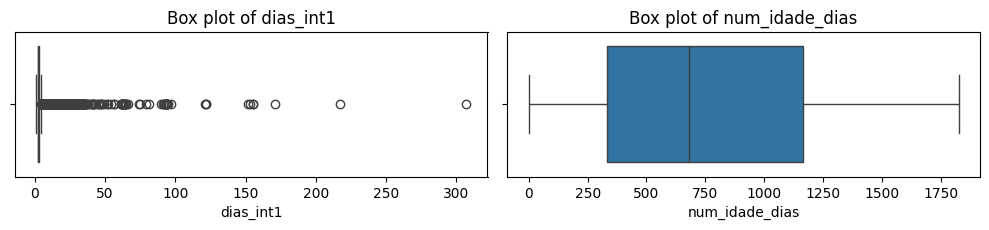

In [ ]:
plt.figure(figsize=(10, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)  # Use a flat index and start from 1
    sns.boxplot(x=X_train[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

#### Histogramas

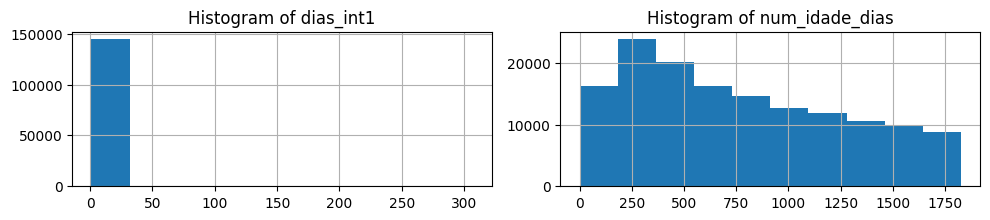

In [ ]:
plt.figure(figsize=(10, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)  # Use a flat index and start from 1
    X_train[feature].hist()
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

#### Identificar o valor discrepante da idade

In [ ]:
X_train[X_train['dias_int1'] >= 100]

,regiao_Norte,regiao_Nordeste,regiao_Sudeste,regiao_Sul,regiao_Centro-Oeste,diag_cat_5.0,diag_cat_8.0,diag_cat_2.0,diag_cat_7.0,diag_cat_15.0,...,diag_cat_12.0,num_idade_dias,dias_int1,natureza_P?blico,natureza_Privado SFL,natureza_Privado,natureza_nan,missing_natureza,ap_sexo_M,status_resi_resi
748835,0,1,0,0,0,0,0,0,0,1,...,0,1080,156.000000,1,0,0,0,0,0,1
366867,0,1,0,0,0,0,0,0,0,0,...,0,504,120.000000,1,0,0,0,0,1,1
29851,1,0,0,0,0,0,0,0,1,0,...,0,821,152.000000,1,0,0,0,0,1,1
1182705,0,0,1,0,0,0,1,0,0,0,...,0,0,193.000000,1,0,0,0,0,1,1
775383,0,1,0,0,0,0,0,0,1,0,...,0,695,184.000000,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345310,0,0,0,1,0,0,0,1,0,0,...,0,149,337.000000,0,1,0,0,0,0,1
1530166,0,0,0,0,1,0,0,0,0,0,...,0,91,123.000000,1,0,0,0,0,1,1
399447,0,1,0,0,0,0,0,0,0,0,...,0,200,127.000000,0,1,0,0,0,0,1
762000,0,1,0,0,0,0,0,1,0,0,...,0,685,155.000000,0,0,1,0,0,1,1


#### Valor da Idade = 176 é certamente um erro, substituir por missing

In [ ]:
# X_train['Idade'] = X_train['Idade'].replace(176, np.nan)

In [ ]:
X_train[numeric_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dias_int1,1091890.000000,3.720991,4.220850,1.000000,2.000000,3.000000,4.000000,338.000000
num_idade_dias,1091916.000000,633.988785,496.493972,0.000000,220.000000,502.000000,975.000000,1826.000000


## Imputação de missings pela média das variáveis quantitativas
#### Obs.: Deve ser feito separadamente no treino/teste. O conjunto de teste deve receber como valor de imputação a média do conjunto de treino

In [ ]:
X_train["dias_int1"] = X_train["dias_int1"].fillna(X_train["dias_int1"].mean())
X_test["dias_int1"] = X_test["dias_int1"].fillna(X_train["dias_int1"].mean())

## Análise das correlações para evitar colinearidade

<Axes: >

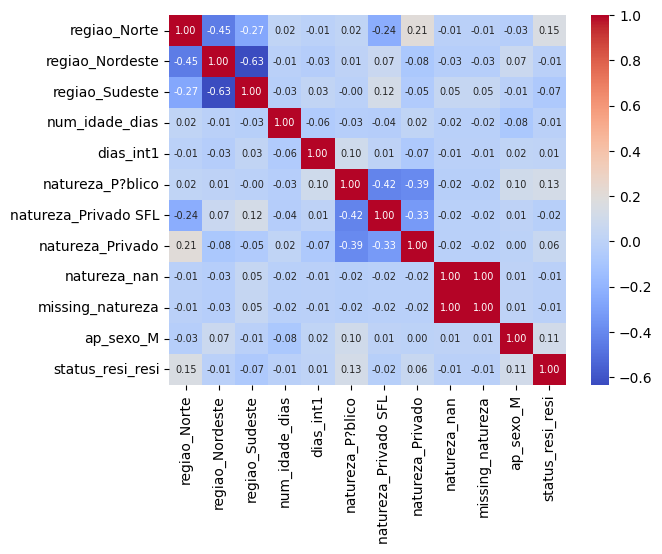

In [28]:
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 7})

#### Entre as duas variáveis, VEF1_L e Teste_6min, excluir a que tem menor correlação com o desfecho

In [ ]:
# df['Melhora'].corr(df['Teste_6min'])

In [ ]:
# df['Melhora'].corr(df['VEF1_L'])

#### Excluir coluna VEF1_L

In [ ]:
# X_train.drop(columns=["VEF1_L"], inplace=True)
# X_test.drop(columns=["VEF1_L"], inplace=True)

## Padronização para quantitativas: StandardScaler
![image.png](attachment:0e3eec10-d76a-4c49-8d92-9b5e762b740a.png)
#### Obs.: Deve ser feito separadamente no treino/teste. A padronização dos dados de teste deve ser feita com a média e desvio-padrão dos dados de treino

In [29]:
numeric_features = ["dias_int1", "num_idade_dias"]

In [30]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

In [31]:
for features in numeric_features:
    scaler = s_scaler.fit(X_train[[features]])
    X_train[features] = scaler.transform(X_train[[features]])
    X_test[features] = scaler.transform(X_test[[features]])

#### Box-plots das variáveis quantitativas padronizadas

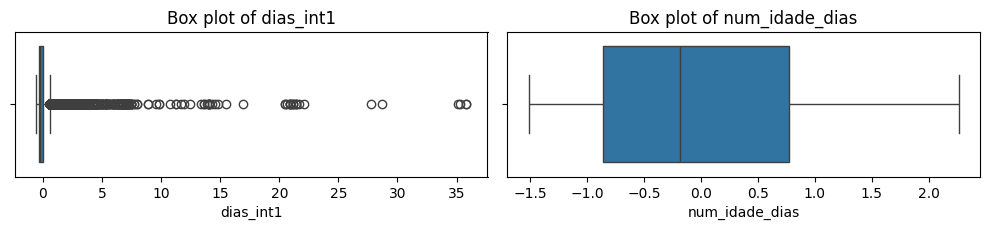

In [32]:
plt.figure(figsize=(10, 4))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)  # Use a flat index and start from 1
    sns.boxplot(x=X_train[feature])
    plt.title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

### Dados prontos para treinar os algoritmos

In [33]:
X_train.head(10)

,regiao_Norte,regiao_Nordeste,regiao_Sudeste,num_idade_dias,dias_int1,natureza_P?blico,natureza_Privado SFL,natureza_Privado,natureza_nan,missing_natureza,ap_sexo_M,status_resi_resi
30569,0,1,0,0.156319,-0.075275,0,1,0,0,0,0,1
35275,0,1,0,-1.059675,-0.075275,1,0,0,0,0,1,1
16826,1,0,0,-1.134124,0.632712,0,0,0,0,0,0,1
37373,0,1,0,-1.059675,-0.075275,1,0,0,0,0,1,1
29117,0,1,0,-0.964546,-0.311270,0,0,1,0,0,1,0
28735,0,1,0,-1.452598,-0.075275,0,1,0,0,0,1,1
37814,0,1,0,1.177919,-0.311270,0,1,0,0,0,1,1
2132,0,1,0,-0.308985,-0.334870,0,0,0,0,0,1,0
8685,0,1,0,1.080722,-0.340770,0,1,0,0,0,0,0
8342,0,0,1,-0.763949,-0.016276,0,1,0,0,0,0,0


# Algoritmos de Machine Learning
### Serão treinados algoritmos baseados em árvores: Random Forest, XGBoost, Catboost, LightGBM
![image.png](attachment:981e881a-2513-4ce8-ac91-538fd9017be5.png)

### Otimização de hiperparâmetros: definir os espaço de possibilidades e usar validação cruzada para escolher a melhor combinação
![image.png](attachment:205241a9-eaae-4963-bd9e-b61fb7b93335.png)

![image.png](attachment:ee58ccc7-68a9-42ff-95ef-c2d03f0004df.png)

In [34]:
!pip install catboost -q
!pip install lightgbm -q
!pip install xgboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [49]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Logistic Regression

Logistic Regression - Accuracy: 0.799
Logistic Regression - Recall: 0.871
Logistic Regression - Precision: 0.762
Logistic Regression - F1: 0.813
Logistic Regression - ROC AUC: 0.88


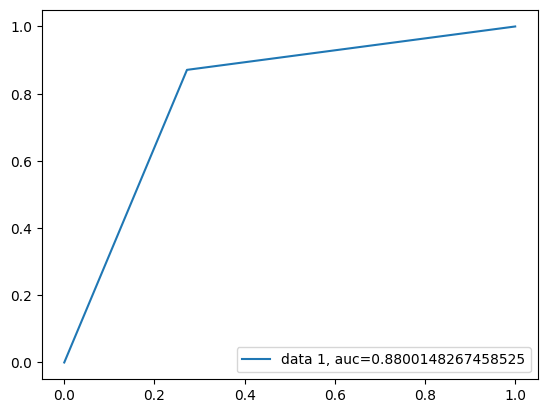

In [58]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
y_prob_rf = clf.predict_proba(X_test)[:, 1]

accuracy_clf = accuracy_score(y_test, y_pred_rf)
recall_clf = recall_score(y_test, y_pred_rf)
precision_clf = precision_score(y_test, y_pred_rf)
f1_clf = f1_score(y_test, y_pred_rf)
auc_clf = roc_auc_score(y_test, y_prob_rf, )

print(f'Logistic Regression - Accuracy:', round(accuracy_clf, 3))
print(f'Logistic Regression - Recall:', round(recall_clf, 3))
print(f'Logistic Regression - Precision:', round(precision_clf, 3))
print(f'Logistic Regression - F1:', round(f1_clf, 3))
print(f'Logistic Regression - ROC AUC:', round(auc_clf, 3))

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr_clf, tpr_clf, _ = metrics.roc_curve(y_test,  y_pred_rf)
plt.plot(fpr_clf,tpr_clf,label="data 1, auc="+str(auc_clf))
plt.legend(loc=4)
plt.show()

## Random Forest

In [37]:
# criando o modelo
rf=RandomForestClassifier(random_state=42)

In [ ]:
# Possibilidades para alguns hiperparâmetros do random forest
# param_grid_rf = {'n_estimators': [20, 50, 100],
#                  'max_features': [2, 3, 4],
#                  'max_depth': [2, 3, 4],
#                 }

In [ ]:
# o modelo fará uma avaliação cruzada com 10 partições para avaliar as combinações de hiperparâmetros
# no fit indicamos quais os dados serão usados para treinamento
# o best_params_ mostrará qual foi a melhor combinação

# grid_search = RandomizedSearchCV(rf, n_iter=5, cv=10, verbose=1, param_distributions=param_grid_rf, random_state=42, n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_params_rf = grid_search.best_params_
# best_params_rf

Random Forest - Accuracy: 0.837
Random Forest - Recall: 0.838
Random Forest - Precision: 0.837
Random Forest - F1: 0.838
Random Forest - ROC AUC: 0.916


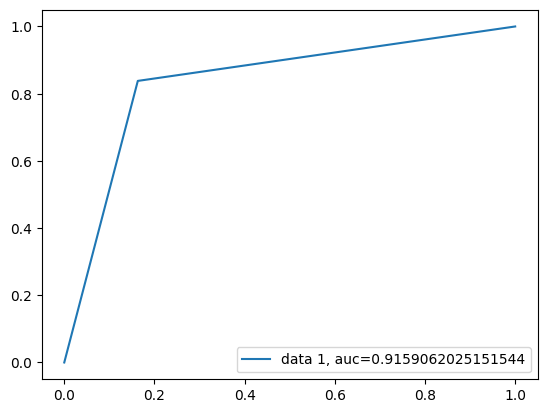

In [59]:
# ajustando o modelo escolhido pelo GridSearchCV
# rf=RandomForestClassifier(**best_params_rf, random_state=42)
rf=RandomForestClassifier(random_state=40)
rf.fit(X_train, y_train)

# os valores PREDITOS são obtidos na amostra de TESTE
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf, )

print(f'Random Forest - Accuracy:', round(accuracy_rf, 3))
print(f'Random Forest - Recall:', round(recall_rf, 3))
print(f'Random Forest - Precision:', round(precision_rf, 3))
print(f'Random Forest - F1:', round(f1_rf, 3))
print(f'Random Forest - ROC AUC:', round(auc_rf, 3))

y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf)
plt.plot(fpr_rf,tpr_rf,label="data 1, auc="+str(auc_rf))
plt.legend(loc=4)
plt.show()

In [ ]:
y_test.describe()


,reint
count,44409.000000
mean,0.206219
std,0.404594
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:

from scipy import stats
stats.describe(y_pred_rf)



DescribeResult(nobs=44409, minmax=(np.int64(0), np.int64(1)), mean=np.float64(0.15825620932693824), variance=np.float64(0.13321418124775442), skewness=np.float64(1.8726658375621017), kurtosis=np.float64(1.5068773391721662))

## XGBoost

In [39]:
# criando o modelo
xgb=XGBClassifier(random_state=42)

In [ ]:
# definindo as possibilidades ou range para alguns hiperparâmetros do XGBoost
# grid_xgboost = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 4, 5],
#     'eta': [0.01, 0.05, 0.1]
# }

In [ ]:
# o modelo fará uma avaliação cruzada com 10 partições para avaliar as combinações de hiperparâmetros
# no fit indicamos quais os dados serão usados para treinamento
# o best_params_ mostrará qual foi a melhor combinação

# grid_search = RandomizedSearchCV(xgb, n_iter=5, cv=10, verbose=1, param_distributions=grid_xgboost, random_state=42, n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_params_xgb = grid_search.best_params_
# best_params_xgb

XGBoost - Accuracy: 0.885
XGBoost - Recall: 0.936
XGBoost - Precision: 0.849
XGBoost - F1: 0.89
XGBoost - ROC AUC: 0.9435778930008663


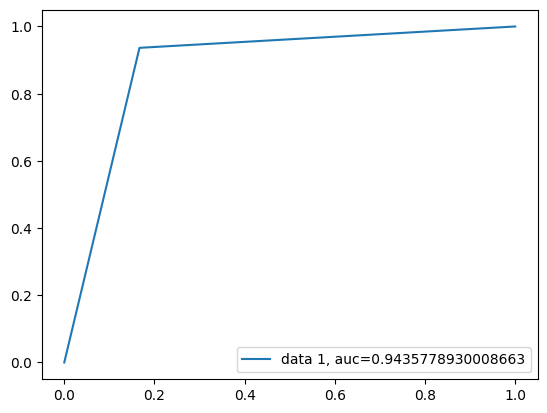

In [54]:
# ajustando o modelo escolhido pelo GridSearchCV
#xgb=XGBClassifier(**best_params_xgb, random_state=42)
xgb=XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# os valores PREDITOS são obtidos na amostra de TESTE
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f'XGBoost - Accuracy:', round(accuracy_xgb, 3))
print(f'XGBoost - Recall:', round(recall_xgb, 3))
print(f'XGBoost - Precision:', round(precision_xgb, 3))
print(f'XGBoost - F1:', round(f1_xgb, 3))
print(f'XGBoost - ROC AUC:', auc_xgb)

y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb)
plt.plot(fpr_xgb,tpr_xgb,label="data 1, auc="+str(auc_xgb))
plt.legend(loc=4)
plt.show()

## Catboost

In [41]:
# criando o modelo
cat = CatBoostClassifier(eval_metric='Logloss', silent = True, random_state=42)

In [ ]:
# definindo as possibilidades ou range para os hiperparâmetros do catboost
# grid_cat = {"depth": [2, 3, 4],
#             "iterations": [20, 50, 100],
#             "learning_rate": [0.01, 0.1]
#            }

In [ ]:
# o modelo fará uma avaliação cruzada com 10 partições para avaliar as combinações de hiperparâmetros
# no fit indicamos quais os dados serão usados para treinamento
# o best_params_ mostrará qual foi a melhor combinação

# grid_search = RandomizedSearchCV(cat, n_iter=5, cv=10, verbose=1, param_distributions=grid_cat, random_state=42, n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_params_cat = grid_search.best_params_
# best_params_cat

Catboost - Accuracy: 0.889
Catboost - Recall: 0.945
Catboost - Precision: 0.85
Catboost - F1: 0.895
Catboost - ROC AUC: 0.948


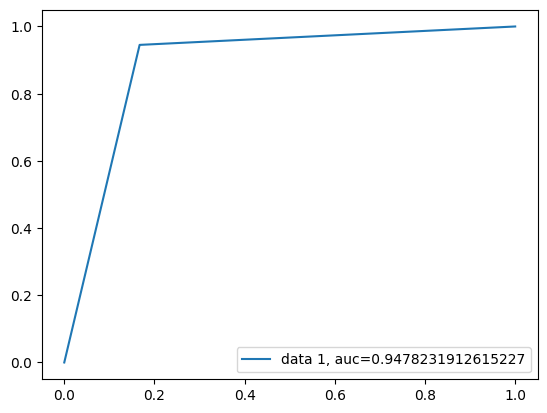

In [60]:
# ajustando o modelo escolhido pelo GridSearchCV
#cat=CatBoostClassifier(**best_params_cat, eval_metric='Logloss', silent = True, random_state=42)
cat=CatBoostClassifier(eval_metric='Logloss', silent = True, random_state=42)
cat.fit(X_train, y_train)

# os valores PREDITOS são obtidos na amostra de TESTE
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y_pred_cat = cat.predict(X_test)
y_prob_cat = cat.predict_proba(X_test)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
accuracy_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_prob_cat)
recall_cat = recall_score(y_test, y_pred_cat)
precision_cat = precision_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat)
print(f'Catboost - Accuracy:', round(accuracy_cat, 3))
print(f'Catboost - Recall:', round(recall_cat, 3))
print(f'Catboost - Precision:', round(precision_cat, 3))
print(f'Catboost - F1:', round(f1_cat, 3))
print(f'Catboost - ROC AUC:', round(auc_cat, 3))


y_pred_proba = cat.predict_proba(X_test)[::,1]
fpr_cat, tpr_cat, _ = metrics.roc_curve(y_test,  y_pred_cat)
plt.plot(fpr_cat,tpr_cat,label="data 1, auc="+str(auc_cat))
plt.legend(loc=4)
plt.show()

## LightGBM

In [43]:
# criando o modelo
lgb = LGBMClassifier(verbose=-1, random_state=42)

In [ ]:
# definindo as possibilidades ou range para os hiperparâmetros do lightgbm
# grid_lgb = {'max_depth': (2, 3, 4),
#             'n_estimators': [50, 100, 200],
#             'learning_rate': [0.05, 0.1, 0.2]
#            }

In [ ]:
# o modelo fará uma avaliação cruzada com 10 partições para avaliar as combinações de hiperparâmetros
# no fit indicamos quais os dados serão usados para treinamento
# o best_params_ mostrará qual foi a melhor combinação

# grid_search = RandomizedSearchCV(lgb, n_iter=5, cv=10, verbose=1, param_distributions=grid_lgb, random_state=42, n_jobs = -1)
# grid_search.fit(X_train, y_train)
# best_params_lgb = grid_search.best_params_
# best_params_lgb

LightGBM - Accuracy: 0.889
LightGBM - Recall: 0.937
LightGBM - Precision: 0.855
LightGBM - F1: 0.894
LightGBM - ROC AUC: 0.948


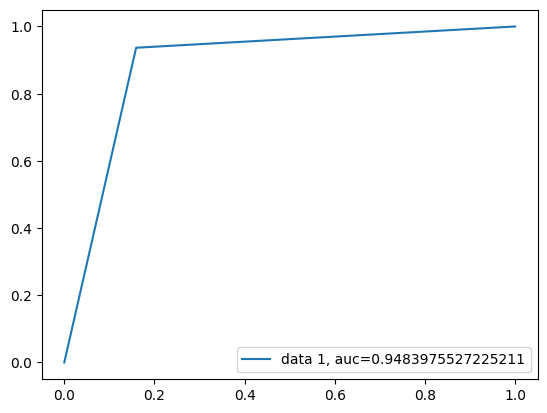

In [61]:
# ajustando o modelo escolhido pelo GridSearchCV
#lgb=LGBMClassifier(**best_params_lgb, verbose=-1)
lgb=LGBMClassifier(verbose=-1)
lgb.fit(X_train, y_train)

# os valores PREDITOS são obtidos na amostra de TESTE
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y_pred_lgb = lgb.predict(X_test)
y_prob_lgb = lgb.predict_proba(X_test)[:, 1]

accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_prob_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f'LightGBM - Accuracy:', round(accuracy_lgb, 3))
print(f'LightGBM - Recall:', round(recall_lgb, 3))
print(f'LightGBM - Precision:', round(precision_lgb, 3))
print(f'LightGBM - F1:', round(f1_lgb, 3))
print(f'LightGBM - ROC AUC:', round(auc_lgb, 3))

fpr_lgb, tpr_lgb, _ = metrics.roc_curve(y_test,  y_pred_lgb)
plt.plot(fpr_lgb,tpr_lgb,label="data 1, auc="+str(auc_lgb))
plt.legend(loc=4)
plt.show()

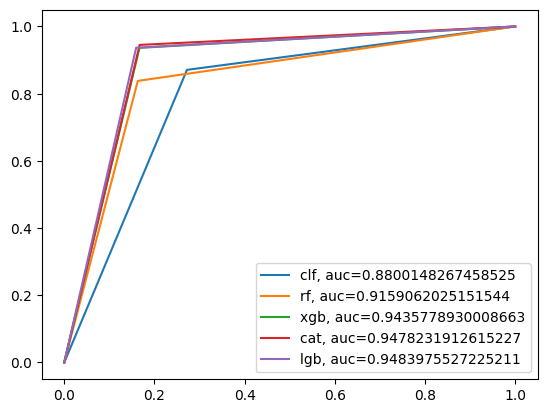

In [68]:
plt.plot(fpr_clf,tpr_clf,label="clf, auc="+str(auc_clf))
plt.plot(fpr_rf,tpr_rf,label="rf, auc="+str(auc_rf))
plt.plot(fpr_xgb,tpr_xgb,label="xgb, auc="+str(auc_xgb))
plt.plot(fpr_cat,tpr_cat,label="cat, auc="+str(auc_cat))
plt.plot(fpr_lgb,tpr_lgb,label="lgb, auc="+str(auc_lgb))

plt.legend(loc=4)
plt.show()

### Criar uma tabela com as métricas para comparar os modelos

In [45]:
# criando uma tabela com as métricas
col_names = ["Modelo", "AUC(ROC)", "Precision", "Recall", "F1", "Accuracy"] # definindo o cabeçalho

# definindo os valores
data = [["Random Forest",auc_rf, precision_rf,recall_rf, f1_rf, accuracy_rf],
        ["XGBoost",auc_xgb, precision_xgb,recall_xgb, f1_xgb, accuracy_xgb],
        ["LightGBM",auc_lgb, precision_lgb,recall_lgb, f1_lgb, accuracy_lgb],
        ["Catboost",auc_cat, precision_cat,recall_cat, f1_cat, accuracy_cat],
        ["Logistic Regression", auc_clf, precision_clf,recall_clf, f1_clf, accuracy_clf]]

In [46]:
pd.set_option('display.float_format', lambda x: '%2f' % x) # tabela com três casas decimais

print('Resultados para conjunto de teste.')
df_results = pd.DataFrame(data, columns = col_names) # transformando os resultados do teste em um data.frame

# função para destacarmos os maiores valores em cada uma das métricas
def highlight_max(s):
    if s.dtype == object:  # Uso do tipo `object` diretamente
        is_max = [False for _ in range(s.shape[0])]  # Declarando que quando o tipo de dado for objeto, não aplicaremos o highlight
    else:
        is_max = s == s.max()
    return ['background: yellow' if cell else '' for cell in is_max]

# Aplicar a função de destaque ao DataFrame
df_results_styled = df_results.style.apply(highlight_max)
df_results_styled

Resultados para conjunto de teste.


,Modelo,AUC(ROC),Precision,Recall,F1,Accuracy
0,Random Forest,0.915906,0.837059,0.838020,0.837539,0.837458
1,XGBoost,0.943578,0.848765,0.936442,0.890450,0.884800
2,LightGBM,0.948398,0.854581,0.936729,0.893771,0.888674
3,Catboost,0.947823,0.849736,0.945194,0.894926,0.889032
4,Logistic Regression,0.880015,0.761893,0.870875,0.812747,0.799369


### Boruta para seleção de preditores
#### Encontrar um conjunto mínimo de preditores que mantenha o desempenho
![image.png](attachment:97a7a2fc-9858-4930-8cea-f8239576592f.png)

In [ ]:
!pip install boruta

In [ ]:
from boruta import BorutaPy

In [ ]:
# Configurando o Boruta (não roda para o algoritmo catboost)
boruta_selector = BorutaPy(xgb, n_estimators='auto', random_state=42)

# Aplicando o Boruta
boruta_selector.fit(X_train.values,y_train)

# Imprimindo os resultados
selected_features = X_train.columns[boruta_selector.support_].to_list()
tentative_features = X_train.columns[boruta_selector.support_weak_].to_list()
remove_features = list(set(X_train.columns) - set(selected_features) - set(tentative_features))

In [ ]:
print("Selected Features:", selected_features)
print("Tentative Features:", tentative_features)
print("To remove Features:", remove_features)

#### Incluir na lista de preditores somente as variáveis consideradas importantes para predição

In [ ]:
# Modelo com Boruta - Selecionado as variáveis preditoras
X_train_boruta = X_train[['Idade', 'IMC', 'Teste_6min', 'Ter_Palpitacoes', 'Tabagismo_Não_fumante']]

X_test_boruta = X_test[['Idade', 'IMC', 'Teste_6min', 'Ter_Palpitacoes', 'Tabagismo_Não_fumante']]

print('Shape sem boruta', X_train.shape, X_test.shape)
print('Shape com boruta', X_train_boruta.shape, X_test_boruta.shape)

#### Retreinar o melhor algoritmo com os preditores selecionados

In [ ]:
# ajustando o modelo escolhido pelo GridSearchCV
cat_boruta=CatBoostClassifier(**best_params_cat, eval_metric='Logloss', silent = True, random_state=42)
cat_boruta.fit(X_train_boruta, y_train)

# os valores preditos são obtidos na amostra de teste
# o precict dará a classificação em uma categoria ou outra do desfecho
# o predict_proba dará a probabilidade de ser classificado na categoria 1 do desfecho
y_pred_cat_boruta = cat_boruta.predict(X_test_boruta)
y_prob_cat_boruta = cat_boruta.predict_proba(X_test_boruta)[:, 1]

# o calculo das métricas deve ser feito comparando o predito com o real (y_test)
# a métrica AUC usa a predict_proba
auc_cat_boruta = roc_auc_score(y_test, y_prob_cat_boruta)
recall_cat_boruta = recall_score(y_test, y_pred_cat_boruta)
precision_cat_boruta = precision_score(y_test, y_pred_cat_boruta)
f1_cat_boruta = f1_score(y_test, y_pred_cat_boruta)

print(f'Catboost pós-BORUTA - Recall:', round(recall_cat_boruta, 3))
print(f'Catboost pós-BORUTA - Precision:', round(precision_cat_boruta, 3))
print(f'Catboost pós-BORUTA - F1:', round(f1_cat_boruta, 3))
print(f'Catboost pós-BORUTA - ROC AUC:', round(auc_cat_boruta, 3))

### Curva ROC do melhor modelo
![image.png](attachment:86042293-32ac-4e06-9031-d587dc2cf2a7.png)

In [ ]:
from sklearn.metrics import roc_curve, auc

# Fazer previsões probabilísticas nas amostras de teste
y_pred_proba_boruta = cat_boruta.predict_proba(X_test_boruta)[:, 1]

# Calcular a curva ROC
fpr_, tpr_, thresholds_ = roc_curve(y_test, y_pred_proba_boruta)
# Calcular a área sob a curva ROC (ROC AUC)
roc_auc_ = auc(fpr_, tpr_)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_, tpr_, color='darkorange', lw=1, label='ROC curve Catboost (AUC = %0.2f)' % roc_auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### SHAP (SHapley Additive exPlanations) para avaliar importância das variáveis

In [ ]:
#!pip install shap

In [ ]:
import shap

In [ ]:
# resultados no teste
shap_values_test = shap.TreeExplainer(cat_boruta).shap_values(X_test_boruta)
shap.summary_plot(shap_values_test, X_test_boruta)